# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50) #was 1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 45


In [5]:
cities

['castro',
 'punta arenas',
 'atuona',
 'knysna',
 'butaritari',
 'itarema',
 'dobson',
 'taolanaro',
 'kodiak',
 'nikolskoye',
 'saldanha',
 'ushuaia',
 'oriximina',
 'tabou',
 'sept-iles',
 'zhigalovo',
 'tailai',
 'lompoc',
 'albany',
 'qaanaaq',
 'rikitea',
 'bengkulu',
 'liberal',
 'avarua',
 'new norfolk',
 'ilulissat',
 'talcahuano',
 'chenghai',
 'bluff',
 'pangnirtung',
 'vaini',
 'lolua',
 'kununurra',
 'mentok',
 'mendoza',
 'gazalkent',
 'flinders',
 'souillac',
 'nanortalik',
 'fortuna',
 'nome',
 'puerto ayora',
 'sentyabrskiy',
 'touros',
 'kaitangata']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        response = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | knysna
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | itarema
Processing Record 7 of Set 1 | dobson
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | oriximina
Processing Record 14 of Set 1 | tabou
Processing Record 15 of Set 1 | sept-iles
Processing Record 16 of Set 1 | zhigalovo
Processing Record 17 of Set 1 | tailai
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 of Set 1 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          39
Lat           39
Lng           39
Max Temp      39
Humidity      39
Cloudiness    39
Wind Speed    39
Country       39
Date          39
dtype: int64

In [31]:
#print(city_url)

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,300.28,50,7,0.60,BR,1679416708
1,punta arenas,-53.1500,-70.9167,284.21,66,100,9.77,CL,1679416432
2,atuona,-9.8000,-139.0333,300.22,64,15,6.17,PF,1679416708
3,knysna,-34.0363,23.0471,291.74,87,0,2.17,ZA,1679416709
4,butaritari,3.0707,172.7902,300.68,76,96,7.47,KI,1679416710


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,300.28,50,7,0.60,BR,1679416708
1,punta arenas,-53.1500,-70.9167,284.21,66,100,9.77,CL,1679416432
2,atuona,-9.8000,-139.0333,300.22,64,15,6.17,PF,1679416708
3,knysna,-34.0363,23.0471,291.74,87,0,2.17,ZA,1679416709
4,butaritari,3.0707,172.7902,300.68,76,96,7.47,KI,1679416710


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

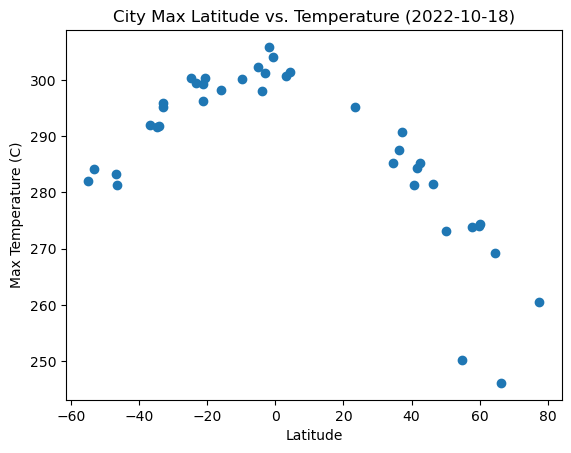

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

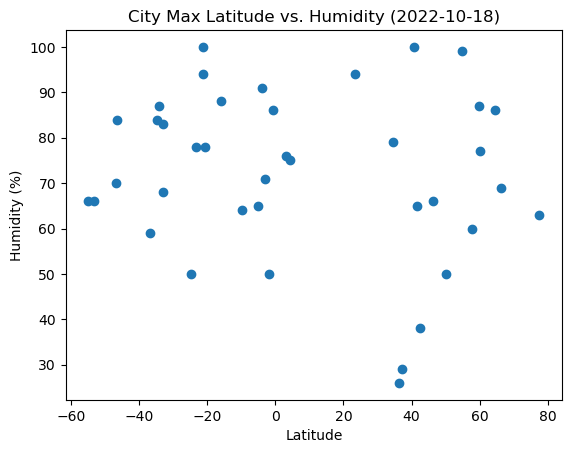

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

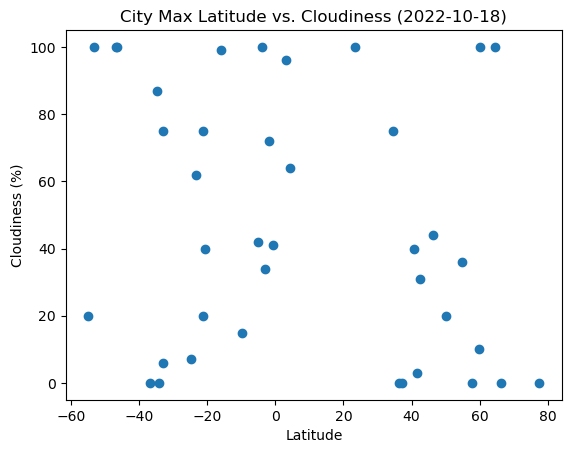

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

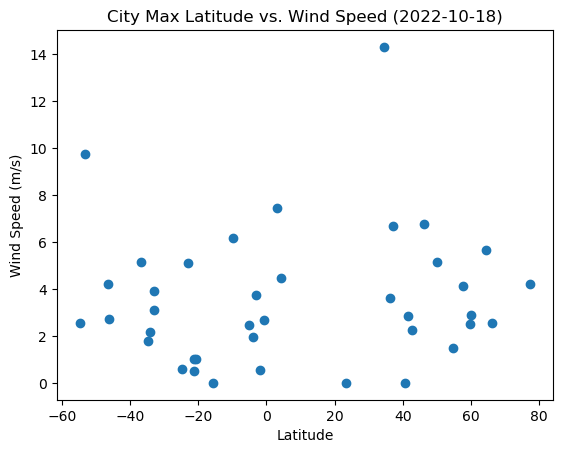

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) #linregress(x_values, y_values)

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df.loc[city_data_df["Lat"]>=0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,butaritari,3.0707,172.7902,300.68,76,96,7.47,KI,1679416710
6,dobson,36.3957,-80.7226,287.59,26,0,3.60,US,1679416711
7,kodiak,57.7900,-152.4072,273.88,60,0,4.12,US,1679416711
8,nikolskoye,59.7035,30.7861,274.09,87,10,2.50,RU,1679416712
12,tabou,4.4230,-7.3528,301.35,75,64,4.47,CI,1679416713


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df.loc[city_data_df["Lat"]<0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castro,-24.7911,-50.0119,300.28,50,7,0.60,BR,1679416708
1,punta arenas,-53.1500,-70.9167,284.21,66,100,9.77,CL,1679416432
2,atuona,-9.8000,-139.0333,300.22,64,15,6.17,PF,1679416708
3,knysna,-34.0363,23.0471,291.74,87,0,2.17,ZA,1679416709
5,itarema,-2.9248,-39.9167,301.17,71,34,3.75,BR,1679416710


###  Temperature vs. Latitude Linear Regression Plot

y = -0.66x +307.84
The r-value is: 0.7295008146939029


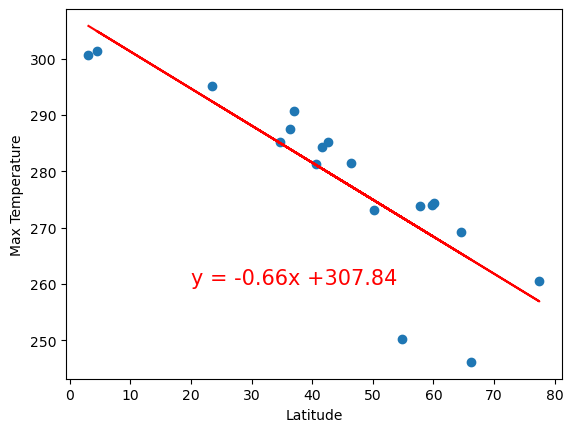

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig1_lin_reg.png")

# Show plot
plt.show()

y = 0.39x +305.12
The r-value is: 0.8432033249427137


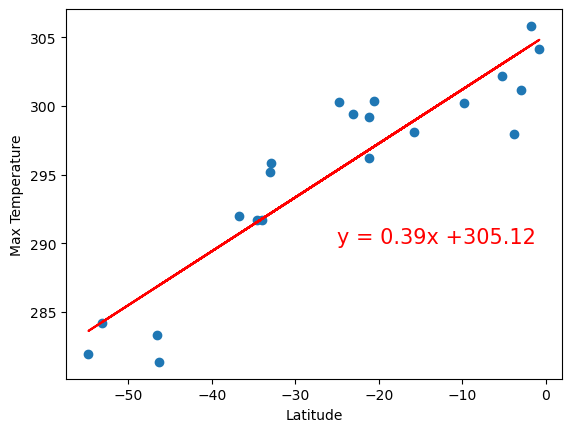

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig2_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** As the lattitude gets closer to the equator the temperature rises. This is consistent with every earth science fact I have ever learned

### Humidity vs. Latitude Linear Regression Plot

y = 0.01x +68.45
The r-value is: 6.046597135126018e-05


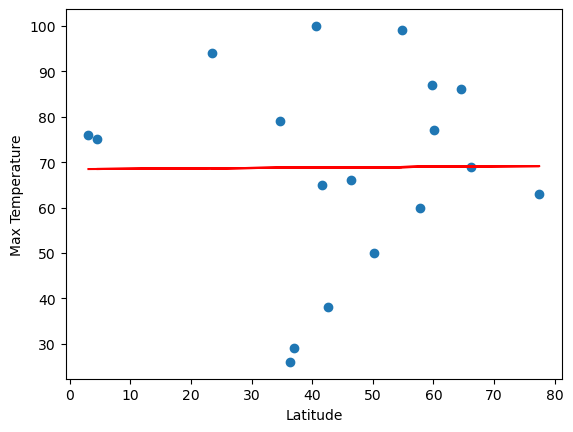

In [35]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig3_lin_reg.png")

# Show plot
plt.show()

y = 0.05x +76.58
The r-value is: 0.003780316827005933


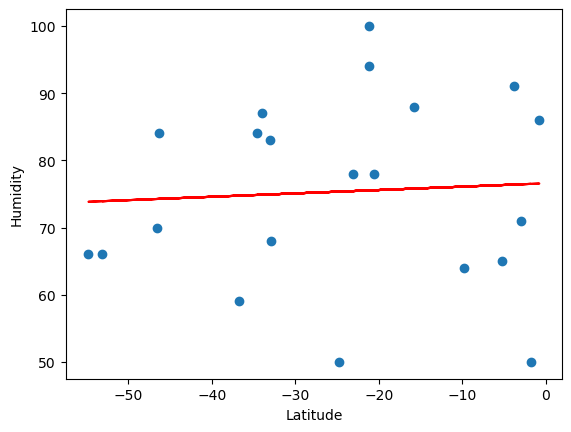

In [38]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig4_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.79x +74.97
The r-value is: 0.15798443652338426


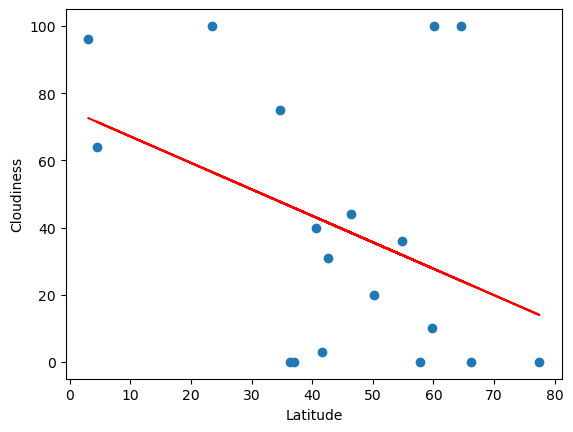

In [36]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig5_lin_reg.png")

# Show plot
plt.show()

y = -0.19x +47.42
The r-value is: 0.007572035223807504


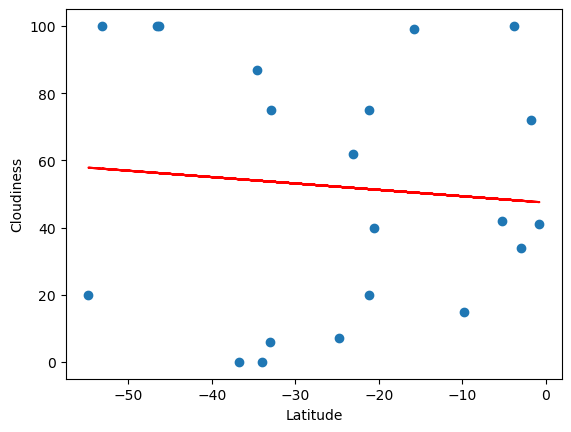

In [39]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig6_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.03x +5.71
The r-value is: 0.03818431474784431


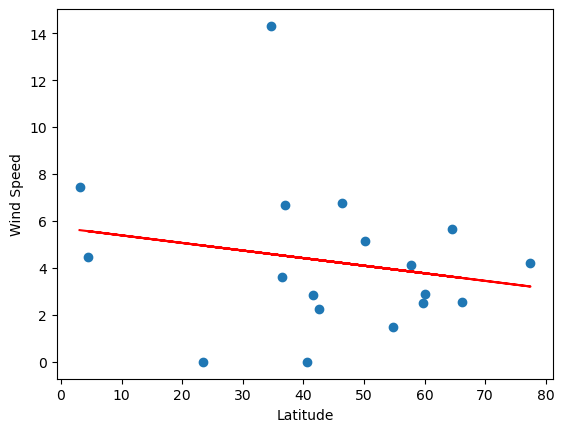

In [37]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig7_lin_reg.png")

# Show plot
plt.show()

y = -0.05x +1.67
The r-value is: 0.1389866126736792


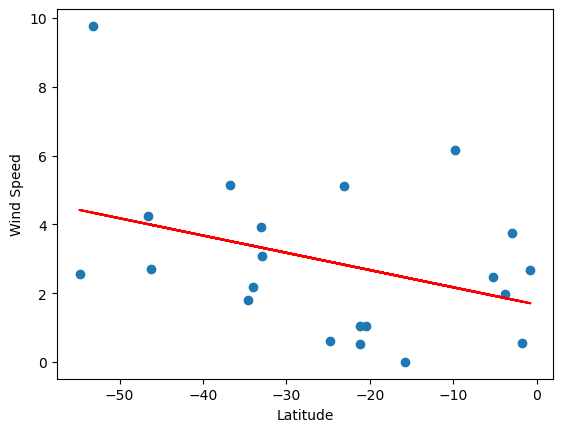

In [40]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Define a function
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)

#Get regression values
regress_values = x_values * slope + intercept

#Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25,290),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#we need to discuss what the r value is, line accounts for 38% of the variability in the picture 

#save the plot
plt.savefig("output_data/Fig8_lin_reg.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE